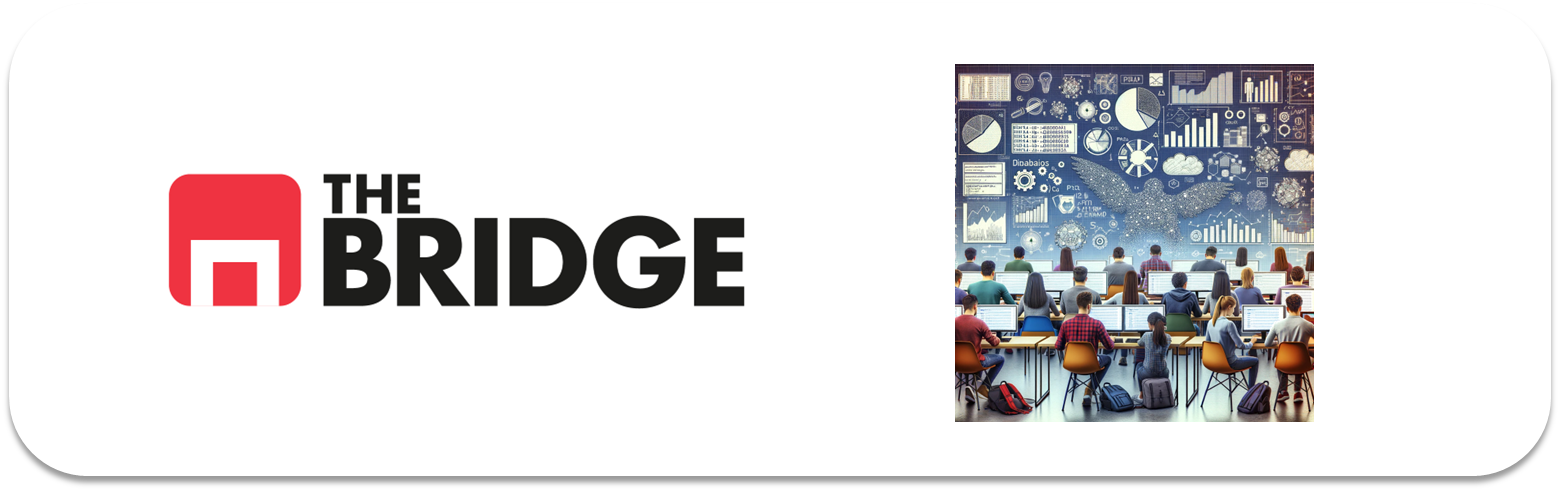

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.

In [33]:
data = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv")

In [34]:
data

,CRIM|ZN|INDUS|CHAS|NOX|RM|AGE|DIS|RAD|TAX|PTRATIO|LSTAT|MEDV
0,0.00632|18.0|2.31|0.0|0.538|6.575|65.2|4.09|1....
1,0.02731|0.0|7.07|0.0|0.469|6.421|78.9|4.9671|2...
2,0.02729|0.0|7.07|0.0|0.469|7.185|61.1|4.9671|2...
3,0.03237|0.0|2.18|0.0|0.458|6.998|45.8|6.0622|3...
4,0.06905|0.0|2.18|0.0|0.458|7.147|54.2|6.0622|3...
...,...
501,0.06263|0.0|11.93|0.0|0.573|6.593|69.1|2.4786|...
502,0.04527|0.0|11.93|0.0|0.573|6.12|76.7|2.2875|1...
503,0.06076|0.0|11.93|0.0|0.573|6.976|91.0|2.1675|...
504,0.10959|0.0|11.93|0.0|0.573|6.794|89.3|2.3889|...


In [35]:
data = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv", delimiter="|")
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.

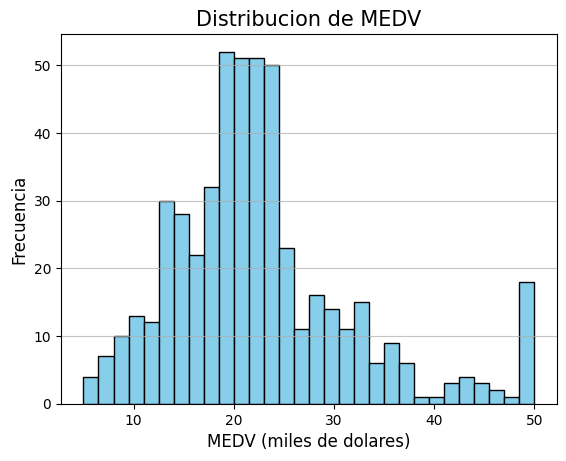

In [36]:
plt.Figure(figsize=(10, 6))
plt.hist(data["MEDV"], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribucion de MEDV", fontsize=15)
plt.xlabel("MEDV (miles de dolares)", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(axis="y", alpha=0.75)
plt.show()

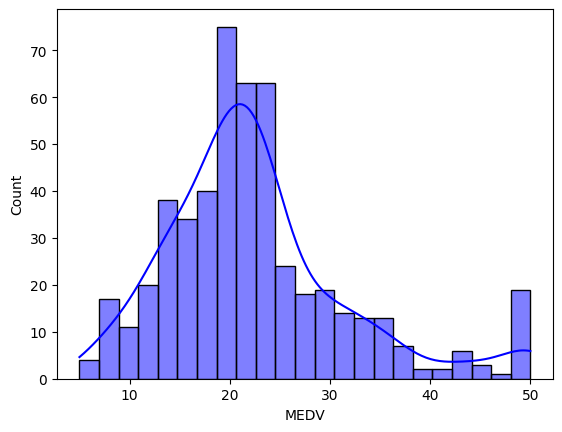

In [37]:
sns.histplot(data["MEDV"], color="blue", kde=True)
plt.show()

3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.


In [38]:
from sklearn.model_selection import train_test_split

# Definimos features (X) y target (y)
X = data.drop("MEDV", axis=1)
y= data["MEDV"]

# Separamos los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vemos las dimensiones de los datos
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 12), (102, 12), (404,), (102,))

4. Construye las parejas X,y de train y test


In [39]:
train_data = X_train.copy()
train_data["MEDV"] = y_train

correlaciones = train_data.corr()["MEDV"].sort_values(ascending=False)
correlaciones

MEDV       1.000000
RM         0.710680
ZN         0.309504
DIS        0.235114
CHAS       0.190642
AGE       -0.340216
CRIM      -0.380091
RAD       -0.387467
NOX       -0.415768
TAX       -0.459795
INDUS     -0.470546
PTRATIO   -0.491210
LSTAT     -0.736422
Name: MEDV, dtype: float64

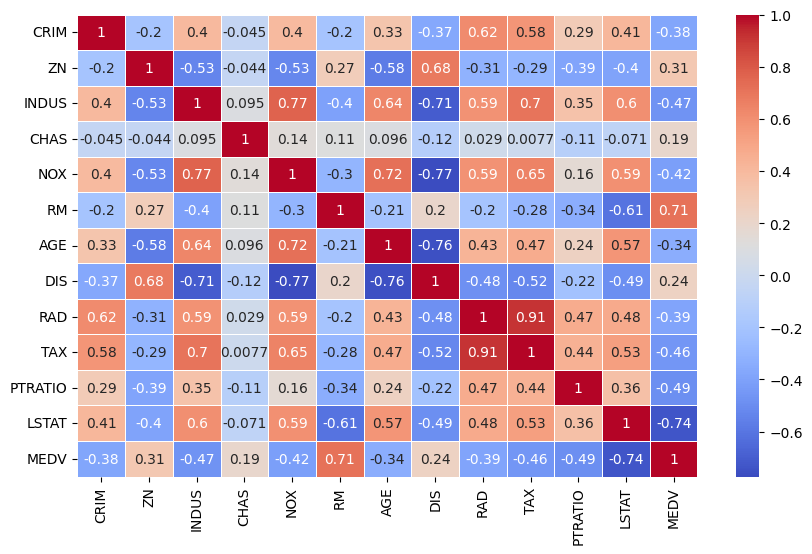

In [40]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.


In [41]:
seleccion_features = correlaciones[abs(correlaciones) > 0.4].index.drop("MEDV")

# Revisemos las correlaciones entre estas variables para ver la multicolinealidad
seleccion_corr_matrix = train_data[seleccion_features].corr()
seleccion_corr_matrix

,RM,NOX,TAX,INDUS,PTRATIO,LSTAT
RM,1.000000,-0.299615,-0.281127,-0.398690,-0.342643,-0.612577
NOX,-0.299615,1.000000,0.650247,0.770957,0.161253,0.593862
TAX,-0.281127,0.650247,1.000000,0.702353,0.444836,0.530632
INDUS,-0.398690,0.770957,0.702353,1.000000,0.348303,0.603644
PTRATIO,-0.342643,0.161253,0.444836,0.348303,1.000000,0.360167
LSTAT,-0.612577,0.593862,0.530632,0.603644,0.360167,1.000000


In [42]:
seleccion_features_final = ["RM", "LSTAT", "PTRATIO", "NOX"]
X_train_seleccion = X_train[seleccion_features_final]
X_test_seleccion = X_test[seleccion_features_final]

# Seleccionamos estas features porque tienen correlaciones significativas con la variable target y no tienen multicolinealidad

6. Trata las variables para que funcionen lo mejor posible en el modelo.


In [43]:
X_train_seleccion.shape, X_test_seleccion.shape

((404, 4), (102, 4))

In [ ]:
# falta transformar:

features_transform = ["LSTAT","PTRATIO","CRIM","AGE"] # features que se transforman de rodrigo
for feature in features_transform:
    train_set[feature] = train_set[feature].apply(np.log)
train_set[features_transform].hist()
plt.tight_layout();

In [ ]:
# escalas aunque yo lo hice mas abajo

7. Construye un modelo de regresión lineal.


In [44]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train_seleccion, y_train)

coef = pd.DataFrame(lm.coef_, index=seleccion_features_final, columns=["Coeficiente"])
coef

,Coeficiente
RM,4.958907
LSTAT,-0.548730
PTRATIO,-0.871256
NOX,-1.663130


8. Analiza si lo crees conveniente los pesos y la importancia de las features.


| Feature|Coeficiente|Interpretación|
|-----------|-------------|---------------|
| RM|4.96|Por cada habitación promedio adicional, el valor aumenta $4,960.|
| LSTAT|-0.55|Cada 1% más de población de estatus bajo reduce $550.|
| PTRATIO|-0.87|Cada punto más en la relación alumno-maestro reduce $870.|
| NOX	|-1.66|Cada incremento de 1 en óxidos de nitrógeno reduce $1,660.|

In [45]:
# Vamos a escalar las features para tener una vision mas clara de su importancia relativa

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_seleccion)
lm_scaled = LinearRegression()
lm_scaled.fit(X_train_scaled, y_train)

# Obtenemos los coeficientes escalados
coef_relativos = pd.DataFrame(lm_scaled.coef_, index=seleccion_features_final, columns=["Coeficiente"])
coef_relativos

,Coeficiente
RM,3.513749
LSTAT,-3.896848
PTRATIO,-1.939365
NOX,-0.195515


|Feature	|Coeficiente (Escalado)|	Importancia Relativa|
|-----------|-------------|---------------|
|LSTAT	|-3.90	|Es la variable más influyente; un cambio en el porcentaje de población de estatus bajo tiene un gran impacto en el valor de las viviendas.|
|RM	|3.51|	También tiene un impacto alto; más habitaciones aumentan significativamente el valor de las viviendas.|
|PTRATIO|	-1.94	|Moderada importancia; la calidad educativa (medida por la relación alumno-maestro) sigue siendo relevante.|
|NOX|	-0.20	|Tiene el menor impacto relativo, pero sigue aportando información sobre la calidad ambiental.|

9. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.


In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = lm.predict(X_test_seleccion)

mae = mean_absolute_error(y_test, y_pred) # Error medio absoluto
mse = mean_squared_error(y_test, y_pred) # Error cuadratico medio
rmse = mse ** 0.5 # Raiz del error cuadratico medio
r2 = r2_score(y_test, y_pred) # Coeficiente de determinacion

evaluacion_lm = {"MAE (Error Medio Absoluto)": mae, "MSE (Error Cuadratico Medio)": mse, "RMSE (Raiz del Error Cuadratico Medio)": rmse, "R2 (Coeficiente de Determinacion)": r2}
evaluacion_lm

{'MAE (Error Medio Absoluto)': 3.3208236096576385,
 'MSE (Error Cuadratico Medio)': 26.97880508276937,
 'RMSE (Raiz del Error Cuadratico Medio)': 5.19411254044128,
 'R2 (Coeficiente de Determinacion)': 0.6321094600589735}

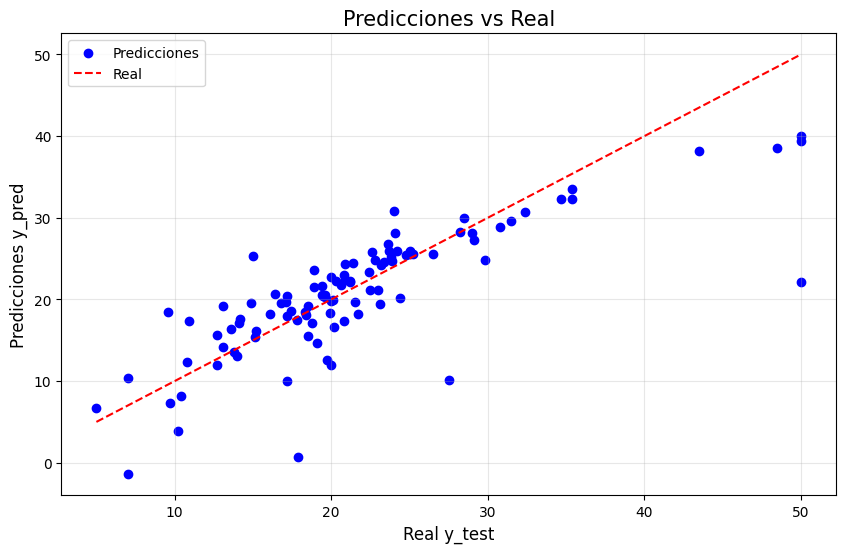

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="blue", label="Predicciones")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Real")
plt.title("Predicciones vs Real", fontsize=15)
plt.xlabel("Real y_test", fontsize=12)
plt.ylabel("Predicciones y_pred", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

- Esto nos indica que con un R2 de 0.63 es de capacidad moderada, es mejorable. Ya que vemos que algunos valores extremos se van de la tendencia general

10. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.


In [57]:
from sklearn.linear_model import Ridge, Lasso

lasso_alphas = [0.1, 0.4, 1]
lasso_resultados = []

for alpha in lasso_alphas:
    lasso_model = Lasso(alpha=alpha, max_iter=10000)
    lasso_model.fit(X_train_seleccion, y_train)
    y_pred_lasso = lasso_model.predict(X_test_seleccion)
    r2_lasso = r2_score(y_test, y_pred_lasso)
    mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    rmse_lasso = np.sqrt(mse_lasso)
    lasso_resultados.append({"Alpha": alpha, "R2": r2_lasso, "MAE": mae_lasso, "RMSE": rmse_lasso})

lasso_resultados_df = pd.DataFrame(lasso_resultados)
lasso_resultados_df

,Alpha,R2,MAE,RMSE
0,0.1,0.634631,3.338579,5.176281
1,0.4,0.643576,3.373889,5.112522
2,1.0,0.642598,3.491330,5.119533


In [60]:
from sklearn.linear_model import ElasticNet
from sklearn import metrics

elastic_net = ElasticNet(alpha=0.5, l1_ratio=1)
elastic_net.fit(X_train_seleccion, y_train)

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, elastic_net.predict(X_train_seleccion)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, elastic_net.predict(X_test_seleccion)))

Train MSE: 27.9518
Test MSE: 26.0217


In [ ]:
# rodri
from sklearn.linear_model import Ridge, Lasso, ElasticNet
ridge_reg = Ridge(alpha = 1000) # L2
lasso_reg = Lasso(alpha = 1000) # L1
elastic_reg = ElasticNet(alpha = 10, l1_ratio = 0.5) # l1_ratio*L1 + (1-l1_ratio)*L2
for nombre, model in zip(["Ridge","Lasso","ElasticNet"],[ridge_reg, lasso_reg, elastic_reg]):
    model.fit(X_train,y_train)
    print("Modelo:", nombre)
    print("TRAIN:")
    pred_train  = model.predict(X_train)
    print("MAE:", median_absolute_error(y_train, pred_train))
    print("RMSE:", root_mean_squared_error(y_train, pred_train))
    print("R^2:", lin_reg.score(X_train, y_train))
    print("TEST:")
    pred_test = model.predict(X_test)
    print("MAE:", median_absolute_error(y_test, pred_test))
    print("RMSE:", root_mean_squared_error(y_test, pred_test))
    print("R^2:", lin_reg.score(X_test, y_test))

11. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?
